<a href="https://colab.research.google.com/github/Chatterjee-Debraj/Genetic-Algorithms-Portfolio-Optimization/blob/main/Genetic_Algo_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genetic Algorithms in Engineering Process Modeling (MT21104)
***Term Project - "Portfolio Optimization using Genetic Algorithms"***

Debraj Chatterjee - 19IM10039 

**Problem Statement -** 

1) Creating a portfolio allocation of different assets so as to minimize the risk of the total portfolio. Hence, creating a **"minimum variance portfolio"** of different assets, using genetic algorithms (Differential Evolution). 

**[Single objective optimization problem]**


Importing the necessary libraries

In [ ]:
import random
import numpy as np

### Creating the model for the problem and all terms relevant to portfolio management

In [ ]:
#Initialization
No_of_Assets = int(input("Enter the number of assets for portfolio consideration : ")) #Number of assets for portfolio consideration
Asset_list = []
for i in range(1,No_of_Assets+1):
  Asset_list.append(input("Enter Asset "+str(i)+" : "))   #List of Names of Assets

list_of_Assets = Asset_list   #Defining this list because the original list will be converted to a class and addresses are getting printed for inputs.




Enter the number of assets for portfolio consideration : 3
Enter Asset 1 : Stocks
Enter Asset 2 : Gold
Enter Asset 3 : Silver


Defining an empty class for an "asset" that will later have various attributes such as annualized returns, and variance (risk)

In [ ]:
class Asset:
  pass

Functions for finding the variance of an asset and covariance of two assets




In [ ]:
def variance(x,mean_return):      #This calculates the variance of an asset x based upon the input returns data
  array = np.array(x)
  array = array - mean_return     #Variance = E((r_i - E(r_i))^2)
  array = np.square(array)
  return sum(array)/len(array)      #Here considering all probabilities as equally likely, so expectation is simply the mean (average)

def covariance(i,j,mean_return_i,mean_return_j):    #This calculates the covariance of two assets i and j based upon the input returns of both
  asset_i = np.array(i)
  asset_j = np.array(j)
  asset_i = asset_i - mean_return_i     
  asset_j = asset_j - mean_return_j
  exp_sum = sum(np.multiply(asset_i,asset_j))     #Covariance = E[(r_i - mean r_i)) * (r_j - mean r_j))]
  return exp_sum/len(asset_i)     #Here considering all probabilities as equally likely, so expectation is simply the mean (average)



Defining the different assets that we have as the class "Asset", and defining the mean returns and variances of each over the past years. 

In [ ]:
No_of_years = int(input("Enter the number of years of past data to be studied : "))                  #Number of years of past data being studied
for i in range(0,No_of_Assets):
  Asset_name = list_of_Assets[i]    #This Asset_name does not become a part of the class and thus useful for not getting addresses in inputs
  returns_list = []     #This list will store the returns of each year of an asset
 
  for years in range(0,No_of_years):
  
    returns_list.append((float(input("Enter the annual % returns of " + str(2020-No_of_years+years+1) + " of " + list_of_Assets[i] + ": ")))/100)   #Taking input of each year's returns for an  asset


  Asset_returns = returns_list  #An extra list created which does not become part of the class "Asset" else data type getting changed while repeating in the same runtime and causing problems
  Asset_list[i] = Asset()     #Each asset is defined to be an object of the defined type "Asset"
  Asset_list[i].name = Asset_name
  Asset_list[i].returns = Asset_returns

  Asset_list[i].avg_return = sum(Asset_list[i].returns)/len(Asset_list[i].returns)    #Return expectation of the asset based on the input data
  Asset_list[i].avg_risk = variance(Asset_list[i].returns,Asset_list[i].avg_return)   #Variance or expected risk of the asset based on the input data

 

  

Enter the number of years of past data to be studied : 3
Enter the annual % returns of 2018 of Stocks: 30
Enter the annual % returns of 2019 of Stocks: 20
Enter the annual % returns of 2020 of Stocks: 25
Enter the annual % returns of 2018 of Gold: 5
Enter the annual % returns of 2019 of Gold: 9
Enter the annual % returns of 2020 of Gold: 7
Enter the annual % returns of 2018 of Silver: 18.4
Enter the annual % returns of 2019 of Silver: 3.1
Enter the annual % returns of 2020 of Silver: 7


In [ ]:
variances = []                    #This list will contain the expected variance of each asset in the portfolio
for i in range(0, No_of_Assets):
  variances.append(variance(Asset_list[i].returns,Asset_list[i].avg_return))    #Calculating the variance of each asset using "variance" function and storing in list

variances = np.array(variances)
standard_deviations = np.sqrt(variances)    #standard deviations of the portfolio are square roots of the variances


Defining the class 'Portfolio'

In [ ]:
class Portfolio:
  pass

Defining a portfolio contents list which will contain the weights of each asset (the decision variables), and randomly assigning weights to the assets.

In [ ]:
def portfolio_builder(No_of_Assets):      #Function to randomly assign weights to a portfolio

  portfolio_contents = []             #Empty list where the weights will be added
  for i in range(0,No_of_Assets-1):
    Asset_list[i].weight = (random.uniform(0,1-sum(portfolio_contents)))    #1-sum(portfolio_contents) because total sum of the weights should be 1
    portfolio_contents.append(Asset_list[i].weight)
  Asset_list[No_of_Assets-1].weight = (1-sum(portfolio_contents))
  portfolio_contents.append(Asset_list[No_of_Assets-1].weight)        #Final weight is given as the difference between 1 and sum of all previous weights because sum has to be 1

  return portfolio_contents   #Returns list of weights


# Developing common terms related to Genetic Algorithms

Now we define a function to find the risk of a portfolio candidate

The risk will be given by the formula 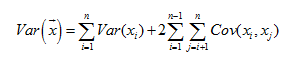

In [ ]:
def portfolio_risk(x):          #Function that will calculate the total risk of a portfolio candidate x
  
  weights = np.array(x.contents)      #Array of weights of assets in the portfolio
  
#Risk term for variances of assets  

  Risk_Term_1 = np.multiply(weights,standard_deviations)      #Total risk = Risk from Variance terms + Risk from Covariance terms
  Risk_Term_1 = np.square(Risk_Term_1)
  Risk_Term_1 = sum(Risk_Term_1)      #First term of the risk equation

#Risk term for covariances between assets

  Risk_Term_2 = 0   #Second term of the risk equation is initially set to 0 and will be updated

  for i in range(0,No_of_Assets-1):
    for j in range(i+1,No_of_Assets):
      Risk_Term_2 = Risk_Term_2 + weights[i]*weights[j]*covariance(Asset_list[i].returns,Asset_list[j].returns,Asset_list[i].avg_return,Asset_list[j].avg_return)
  Risk_Term_2 = 2*Risk_Term_2

  Total_risk = Risk_Term_1 + Risk_Term_2    #From the risk equation, risk = Term 1 + Term 2

  return Total_risk     #Returning the total risk of the portfolio



We are trying to build a minimum variance (minimum risk) portfolio. 

Therefore, the fitness function will be the negative of the portfolio risk and constraint penalties added to it.

In [ ]:
def risk_fitness(x):                  #Function to calculate the fitness 
  penalty1 = 0                     #Penalty factor for the constraints
  penalty2 = 0
  bad_weight = 0
  for weight in x.contents:
    if weight < 0:            #The weights have to be non negative, so adding the appropriate penalty for the constraint
      penalty1 = 10000000
      bad_weight = bad_weight+1
  if sum(x.contents) is not 1:    #If the sum of the assets is not 1, then a constraint is violated
    penalty2 = 1000000
    
    return (-portfolio_risk(x) - penalty2*abs(1-sum(x.contents)) - penalty1*bad_weight) #Taking the negative of the risk (as it is a minimization problem) and applying the appropriate constraint penalties
  else:
    return (-portfolio_risk(x))    #Since it is a minimization problem, we take the negative of the risk as the fitness
  


Function to find out the average fitness and best fitness of the population

In [ ]:
def pop_fitness(x):           #Function for calculating the average fitness of the population
  avg_pop_fitness = 0
  for i in range(0,len(x)):
    avg_pop_fitness = avg_pop_fitness + risk_fitness(x[i])
  avg_pop_fitness = avg_pop_fitness/len(x)
  return avg_pop_fitness        #The average fitness of the population

def best_fitness(x):        #Function for calculating the maximum ftness of the population
  fitnesses = []
  for i in range(0,len(x)):
    fitnesses.append(risk_fitness(x[i]))
  return max(fitnesses)       #The maximum fitness of the population

## Differential Evolution - 

Creating an initial population of portfolios

In [ ]:
Portfolio_names = []          #Empty list used to store names of the portfolios which will be converted to class "Portfolio"
Portfolio_candidates = []     #Empty initial population
Pop_size = 10*No_of_Assets    #In Differential Evolution, population size is 10 times the number of variables
for i in range(0,Pop_size):
  Portfolio_names.append('Portfolio'+ str(i+1))     #Giving name to each portfolio as Portfolio 1, Portfolio 2...
for i in range(0,len(Portfolio_names)):
  Portfolio_names[i]=Portfolio()                                  #Each portfolio defined as the class object 'Portfolio'
  Portfolio_names[i].contents = portfolio_builder(No_of_Assets)     #Each portfolio is distributed the wieghts of the assets randomly
  Portfolio_candidates.append(Portfolio_names[i])                   #List of portfolio candidates
print("The Initial Population is - ")
for items in Portfolio_candidates:
  print(items.contents)



The Initial Population is - 
[0.3922294141125786, 0.32039468797381304, 0.2873758979136083]
[0.7644477659249955, 0.17641058610877255, 0.05914164796623189]
[0.46689976741676986, 0.1510277332012376, 0.3820724993819925]
[0.25051385260237713, 0.5037682173669553, 0.24571793003066755]
[0.9082664984442786, 0.0034817946958058646, 0.08825170685991546]
[0.7723618552615898, 0.1694226547603694, 0.05821548997804071]
[0.5332392301514425, 0.3917590902953957, 0.07500167955316184]
[0.40102214255694313, 0.3400124534956513, 0.25896540394740564]
[0.34590682563605957, 0.11505955067943062, 0.5390336236845098]
[0.4568914033777497, 0.11226886616449865, 0.4308397304577517]
[0.9025941097180842, 0.04503042572562592, 0.05237546455628994]
[0.6983216472380808, 0.016963918031565085, 0.2847144347303542]
[0.4459763400569947, 0.2216451429101921, 0.3323785170328132]
[0.5256729165867093, 0.4603380410127844, 0.013989042400506246]
[0.5398932156715316, 0.11746689349977113, 0.3426398908286973]
[0.9274486346111066, 0.070463680

The algorithm will be executed for 1000 generations 

In [ ]:
epsilon = 0.01
mutation_factor = 0.05
crossover_factor = 0.7
best = best_fitness(Portfolio_candidates)   #Initial population best fitness
average = pop_fitness(Portfolio_candidates)   #Initial population average fitness


#while (best - average > epsilon):
for iter in range(0,1000):
#while (average < Decimal(0.9)*best):
  intermediate_population = Portfolio_candidates                                #Creating the intermediate population for the iteration
  for i in range(0,len(intermediate_population)):

    #CROSSOVER
    Parent1 = random.randint(0,len(intermediate_population)-1)                  #Randomly selecting parent 1 for crossover
    Parent2 = random.randint(0,len(intermediate_population)-1)                  #Randomly selecting parent 2 for crossover
    while Parent2 is Parent1:                                                   #This loop runs if Parent2 is equal to Parent1 since we need two different parents for crossover
      Parent2 = random.randint(0,len(intermediate_population)-1)

    intermediate_population[i].contents = np.array(intermediate_population[i].contents)     #Making the contents of the portfolio as an array

    exemption = random.randint(0,No_of_Assets)    #starting point of mutation is not crossovered
    for point in range(0,No_of_Assets):         #Crossover for all variables
      if point is not exemption:
        mask = random.random()        #Crossover occurs only where the probability is favourable

        if mask <= crossover_factor:
          intermediate_population[i].contents[point] = Portfolio_candidates[Parent2].contents[point]    #Parent2 passes down the value of its variable (crossover favourable)
        else:
          intermediate_population[i].contents[point] = Portfolio_candidates[Parent1].contents[point]    #Child gets variable value of parent1

    #MUTATION
    Parent_j = random.randint(0,len(intermediate_population)-1)         #Randomly selecting parent_j for mutation
    Parent_k = random.randint(0,len(intermediate_population)-1)         #Randomly selecting parent_k for mutation
    while Parent_k is Parent_j:                                    #This loop runs if Parent_k is equal to Parent_j since we need two different members for mutation
      Parent_k = random.randint(0,len(intermediate_population)-1)

    intermediate_population[i].contents = np.array(intermediate_population[i].contents)   #Making the portfolio contents as an array
    intermediate_population[i].contents = intermediate_population[i].contents + mutation_factor*(np.array(Portfolio_candidates[Parent_j].contents) - np.array(Portfolio_candidates[Parent_k].contents)) #Vector differential mutation of differential evolution
   
    #FITNESS COMPARISON
    if risk_fitness(intermediate_population[i])>risk_fitness(Portfolio_candidates[i]):      #Comparing the intermediate candidate and the original candidate
      Portfolio_candidates[i] = intermediate_population[i]            #Replacing the original by the intermediate if intermediate candidate is fitter

  #UPDATING THE POPULATION CHARACTERISTICS
  best = best_fitness(Portfolio_candidates)           #Updating the best fitness of the new population
  average = pop_fitness(Portfolio_candidates)         #Updating the average fitness of the new population



After the algorithm has found out the fittest population, we will obtain the fittest individual (our optimal portfolio)

In [ ]:
fittest_portfolio = 0
max_fitness = 0
for i in range(0,len(Portfolio_candidates)):                    #Loop for finding out the index of the fittest portfolio candidate solution
  if risk_fitness(Portfolio_candidates[i])>max_fitness:
    max_fitness = risk_fitness(Portfolio_candidates[i])
    fittest_portfolio = i

print("The final population is : ")           #Printing out the final population
for items in Portfolio_candidates:
  print(items.contents, end =" ")
  print('\n')

print("The average fitness is : ")                
print(pop_fitness(Portfolio_candidates))        #Printing out the average fitness of the population

print("\n The Best fitness is : ")
print(best_fitness(Portfolio_candidates))         #Printing out the maximum (best) fitness of the population


print("\n The weights of the assets in the best portfolio is: ")
print(Portfolio_candidates[fittest_portfolio].contents)             #Printing out the weights of the assets in the best portfolio

for i in range(0,No_of_Assets):
  print("\n Weightage of ", end =" ") 
  print(Asset_list[i].name, end =" ") 
  print("in your portfolio should be ")
  print(Portfolio_candidates[fittest_portfolio].contents[i])      #Printing the weights of the assets in the best portfolio one by one



The final population is : 
[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569 0.02893058 0.39016576] 

[0.87283569